<a href="https://colab.research.google.com/github/raymondhess/SI24_GOES-SWE/blob/main/SI_metrics_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_______________________________________
 **EVALUATION METRICS**
 _____________________________________

We will use the Hydrostats library that contains evaluation metrics.
***HydroGof for R studio.

LINK: https://github.com/BYU-Hydroinformatics/Hydrostats

**Hydrostats:**
Hydrostats contains tools for: contains over 70 error metrics
Preprocessing data

*  Preprocessing data
*  Visualizing data
*  Error metrics

In [ ]:
!git clone https://github.com/BYU-Hydroinformatics/Hydrostats.git

Cloning into 'Hydrostats'...
remote: Enumerating objects: 2524, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 2524 (delta 90), reused 93 (delta 87), pack-reused 2422
Receiving objects: 100% (2524/2524), 5.92 MiB | 18.66 MiB/s, done.
Resolving deltas: 100% (1268/1268), done.


In [ ]:
!pip install hydrostats --upgrade --no-cache-dir


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for hydrostats: filename=hydrostats-0.78-py3-none-any.whl size=33247 sha256=1855a74d3ffd9d619b226fd545ce1f67877451ceef8d9167d93a1e377a6ad0bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-m9w18fc4/wheels/3f/ce/ad/6f064f4b13e2081210fc5da8081f5efa6978f44a145d0c2e90
  Created wheel for HydroErr: filename=HydroErr-1.24-py3-none-any.whl size=20184 sha256=204df2400e7f71f0bab23d4cab5f6f727aec293d6bd58a6d298cca84628b55dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-m9w18fc4/wheels/8d/e9/18/d0b606eee232002e55f79178ae1077fb4bb082600f70cfe383
Successfully built hydrostats HydroErr


In [ ]:
from hydrostats.metrics import *  # Import all metrics functions
# or import specific functions you need:
# from hydrostats.metrics import nse, kge, etc.

In [ ]:
# Example with MAE
import numpy as np
import hydrostats as hs # Import the hydrostats module and give it the alias 'hs'

# Data
observed = np.array([1, 2, 3, 4, 5])
simulated = np.array([1.1, 1.9, 3.2, 3.8, 5.1])

# MAE
mae_value = hs.mae(observed, simulated) # Now you can use hs to access functions from the hydrostats module
print('MAE:', mae_value)


MAE: 0.14000000000000004


In [ ]:
#Combining different metrics
#https://hydroerr.readthedocs.io/en/stable/list_of_metrics.html

import pandas as pd

# Example
observed = np.array([1, 2, 3, 4, 5])
simulated = np.array([1.1, 1.9, 3.2, 3.8, 5.1])

# Metrics
me_value = hs.me(observed, simulated)
mae_value = hs.mae(observed, simulated)
kge_value = hs.kge_2009(observed, simulated)
nse_value = hs.nse(observed, simulated)
rmse_value = hs.rmse(observed, simulated)
pearson_value = hs.pearson_r(observed, simulated)

# Dictionary with metrics
metrics = {
    'ME': [me_value],
    'MAE': [mae_value],
    'KGE': [kge_value],
    'NSE': [nse_value],
    'RMSE': [rmse_value],
    'Pearson' : [pearson_value],
}

metrics_df = pd.DataFrame(metrics)# dataframe

print(metrics_df)


     ME   MAE       KGE       NSE      RMSE   Pearson
0 -0.02  0.14  0.990272  0.988898  0.148324  0.994586


__________________________________________________________
**EXAMPLE**
__________________________________________________________

We will use a comparison metric study for a place in Utah, located in Provo, Provo River.

In [ ]:
#Visualization
!pip install folium

# Importing libraries
import folium

# Coordinates Provo River
C1 = [40.2370, -111.6958]
C2 = [40.5034, -111.4431]

# Map
center = [(C1[0] + C2[0]) / 2, (C1[1] + C2[1]) / 2] # Replace 'fuente' with 'C1'
map = folium.Map(location=center, zoom_start=10)

# Marks
folium.Marker(C1, popup="Utah Lake").add_to(map)
folium.Marker(C2, popup="Deer Creek Reservoir").add_to(map)

map


____________________________________________________
**OBTAINING DATA FROM NATIONAL WATER MODEL (NWM)**
____________________________________________________
**To identify Reachid**
[link text](https://water.noaa.gov/map)

In [ ]:
!pip install s3fs zarr -q &> log.log

In [ ]:
# read from s3 bucket
import s3fs
import pandas as pd
import xarray

In [ ]:
# set anon to False if you have a credential file stored on your system
s3 = s3fs.S3FileSystem(anon=True, client_kwargs=dict(region_name='us-east-1'))
store = s3fs.S3Map(root='s3://noaa-nwm-retro-v2-zarr-pds', s3=s3, check=False)

In [ ]:
reach_id = 10376596 #Provo River, you could change to the interest reach id

In [ ]:
nwm_ds = xarray.open_zarr(store)

In [ ]:
nwm_times = nwm_ds['time'].values

In [ ]:
q_list = nwm_ds['streamflow'].sel(feature_id=reach_id).values

In [ ]:
df = pd.DataFrame(q_list, index=nwm_times)

In [ ]:
df = pd.DataFrame({'dateTime': nwm_times, 'discharge_cms': q_list})

In [ ]:
df

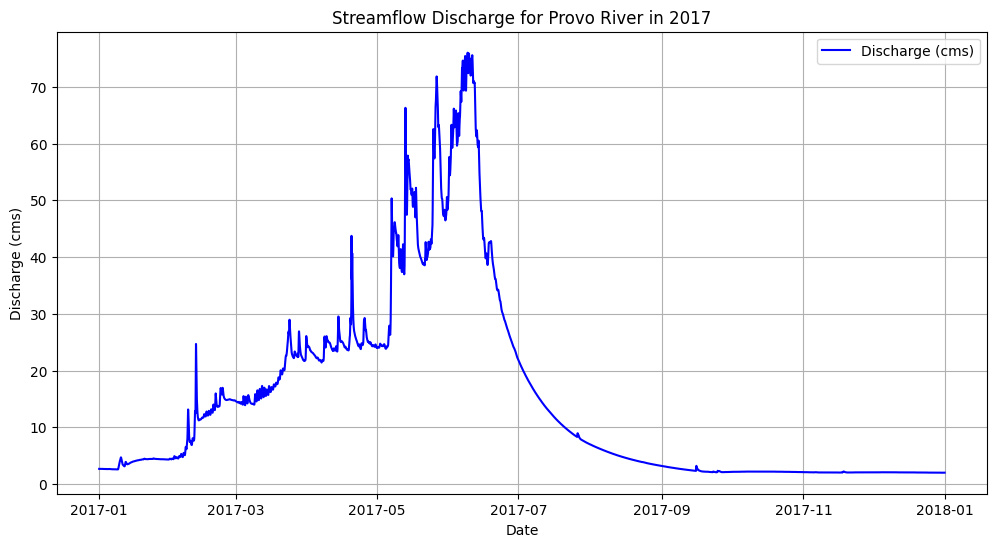

In [ ]:
# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Filter the data for the interest year
df_2017 = df[df['dateTime'].dt.year == 2017] #in this case we will use 2017

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_2017['dateTime'], df_2017['discharge_cms'], label='Discharge (cms)', color='blue')
plt.xlabel('Date')
plt.ylabel('Discharge (cms)')
plt.title('Streamflow Discharge for Provo River in 2017')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#df.to_csv(f'nwm_retrospective_{reach_id}.csv') #in case you wanna download the data.

_________________________________________________
**#USGS DATA**
__________________________________________________
USGS Gauge Station: 10163000
[link text](https://water.noaa.gov/map)

In [ ]:
#Importing libraries
import requests

In [ ]:
# Function to fetch data from USGS
def fetch_usgs_data(site, start_date, end_date):
    # USGS NWIS URL for site data
    url = f"https://waterservices.usgs.gov/nwis/iv/?format=json&sites={site}&startDT={start_date}&endDT={end_date}&parameterCd=00060,00065"

    try:
        # Fetch the data
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        data = response.json()

        # Check if the response contains the expected keys
        if 'value' in data and 'timeSeries' in data['value']:
            time_series = data['value']['timeSeries']
        else:
            print("Unexpected response format:", data)
            return pd.DataFrame()

        # Parse the data into a list of dictionaries
        records = []
        for series in time_series:
            for value in series['values'][0]['value']:
                # Convert from cfs to cms
                flow_cfs = float(value['value'])
                flow_cms = flow_cfs * 0.0283168

                records.append({
                    'dateTime': value['dateTime'],
                    'value_cms': flow_cms
                })

        # Convert to DataFrame
        df = pd.DataFrame(records)
        return df

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()

In [ ]:
# Fetch data
site = "10163000"  # Replace with your site code
start_date = "2017-01-01"  # Replace with your start date
end_date = "2017-12-31"  # Replace with your end date
df_usgs = fetch_usgs_data(site, start_date, end_date)

In [ ]:
print(df_usgs.head())

                           value_cms
dateTime                            
2017-01-01 00:00:00-07:00   2.613641
2017-01-01 00:15:00-07:00   2.613641
2017-01-01 00:30:00-07:00   2.613641
2017-01-01 00:45:00-07:00   2.613641
2017-01-01 01:00:00-07:00   2.613641


In [ ]:
df_usgs['dateTime'] = pd.to_datetime(df_usgs['dateTime'], utc=True)
df_usgs.set_index('dateTime', inplace=True)

In [ ]:
df_usgs = df_usgs[['value_cms']]  # Assuming 'value_cms' is the correct column for streamflow

In [ ]:
# from 15 min to hourly
df_hourly = df_usgs.resample('H').mean()
print(df_hourly.head())

                           value_cms
dateTime                            
2017-01-01 07:00:00+00:00   1.400266
2017-01-01 08:00:00+00:00   1.393505
2017-01-01 09:00:00+00:00   1.374639
2017-01-01 10:00:00+00:00   1.381400
2017-01-01 11:00:00+00:00   1.401682


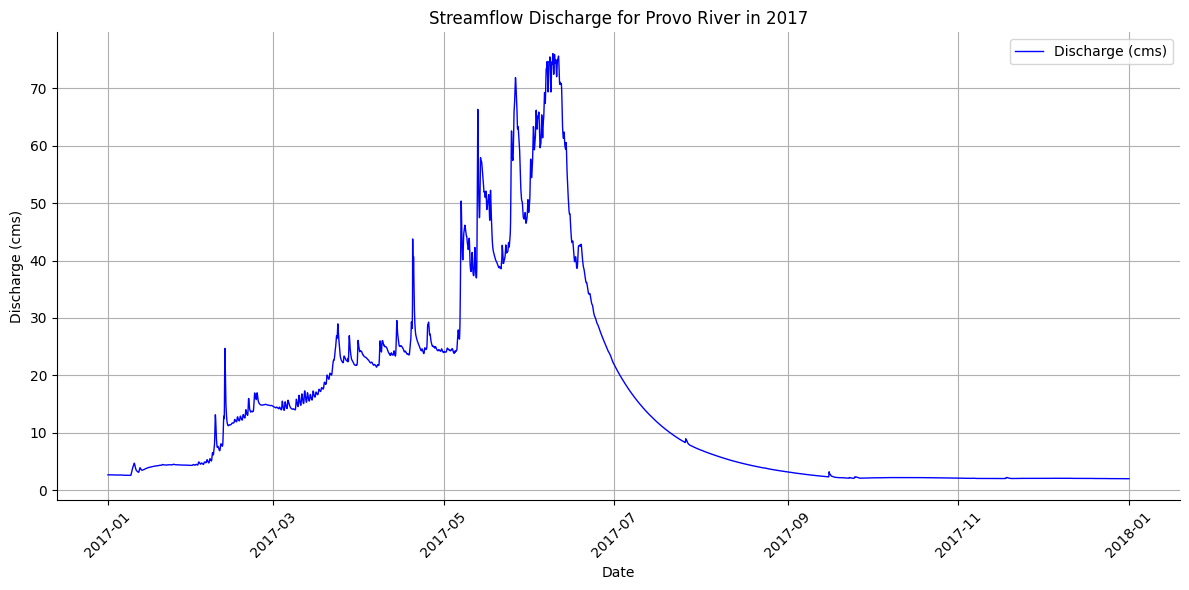

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_2017['dateTime'], df_2017['discharge_cms'], label='Discharge (cms)', color='blue', linestyle='-', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Discharge (cms)')
plt.title('Streamflow Discharge for Provo River in 2017')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()

In [ ]:
# Optionally save the data to a CSV file
#df_usgs.to_csv('usgs_data.csv', index=True)

_________________________
**EVALUATION METRICS**
______________________

In [ ]:
nwm=df_2017 #NWM
print(nwm.head())

                           discharge_cms
dateTime                                
2017-01-01 00:00:00+00:00           2.69
2017-01-01 01:00:00+00:00           2.69
2017-01-01 02:00:00+00:00           2.69
2017-01-01 03:00:00+00:00           2.69
2017-01-01 04:00:00+00:00           2.69


In [ ]:
# Convert 'dateTime' to datetime objects (assuming it's still the index)
nwm.index = pd.to_datetime(nwm.index, utc=True)

In [ ]:
usgs=df_hourly #USGS
print(usgs.head())

                     value_cms
dateTime                      
2017-01-01 07:00:00   1.400266
2017-01-01 08:00:00   1.393505
2017-01-01 09:00:00   1.374639
2017-01-01 10:00:00   1.381400
2017-01-01 11:00:00   1.401682


In [ ]:
nwm.index = nwm.index.tz_localize(None)
usgs.index = usgs.index.tz_localize(None)

In [ ]:
merged_df = nwm.join(usgs, how='inner', lsuffix='_nwm', rsuffix='_usgs')

In [ ]:
merged_df
print (merged_df.head())

                     discharge_cms  value_cms
dateTime                                     
2017-01-01 07:00:00           2.69   1.400266
2017-01-01 08:00:00           2.69   1.393505
2017-01-01 09:00:00           2.69   1.374639
2017-01-01 10:00:00           2.69   1.381400
2017-01-01 11:00:00           2.69   1.401682


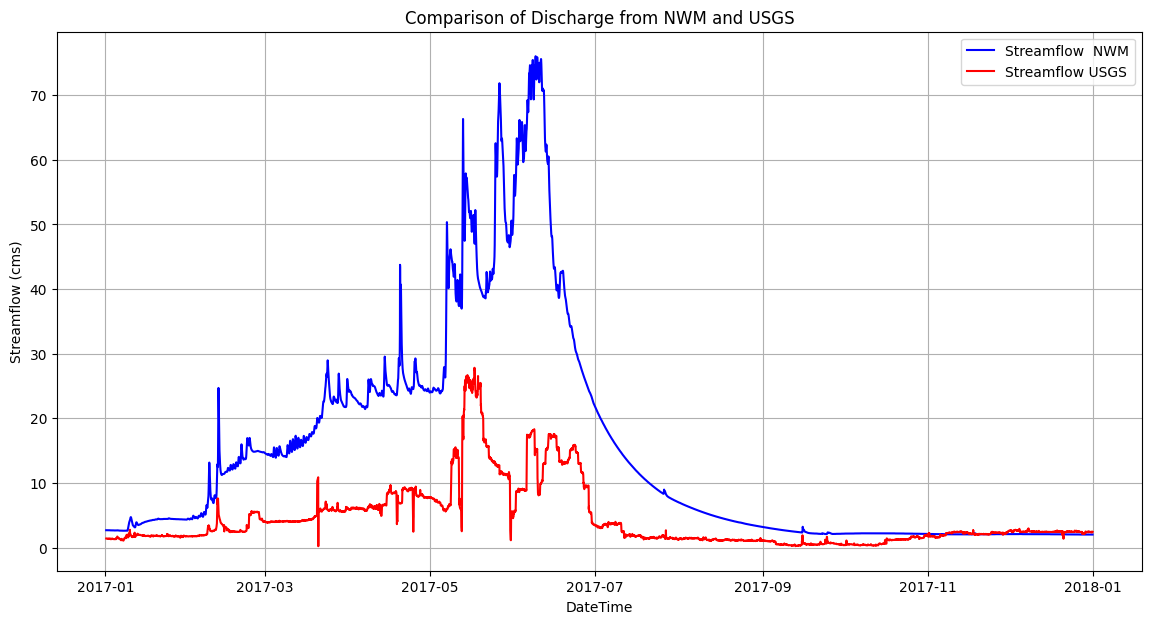

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(merged_df.index, merged_df['discharge_cms'], label='Streamflow  NWM', color='blue')
plt.plot(merged_df.index, merged_df['value_cms'], label='Streamflow USGS', color='red')
plt.xlabel('DateTime')
plt.ylabel('Streamflow (cms)')
plt.title('Comparison of Discharge from NWM and USGS')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
    # Eliminate NaNs
    clean_df = merged_df.dropna(subset=['discharge_cms', 'value_cms'])

    nwm_discharge_clean = clean_df['discharge_cms']
    usgs_value_clean = clean_df['value_cms']

    me_value = hs.me(nwm_discharge_clean, usgs_value_clean)
    mae_value = hs.mae(nwm_discharge_clean, usgs_value_clean)
    kge_value = hs.kge_2009(nwm_discharge_clean, usgs_value_clean)
    nse_value = hs.nse(nwm_discharge_clean, usgs_value_clean)
    rmse_value = hs.rmse(nwm_discharge_clean, usgs_value_clean)

    metrics = {
        'ME': [me_value],
        'MAE': [mae_value],
        'KGE': [kge_value],
        'NSE': [nse_value],
        'RMSE': [rmse_value],
    }

In [ ]:
metrics_df = pd.DataFrame(metrics)

print(metrics_df)

          ME        MAE       KGE        NSE       RMSE
0  10.268446  10.361669 -2.399701 -10.525662  16.652538
